In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
churn_data = pd.read_csv("//content/Retention vs Churn analysis - SJ - Phase 2 - Web All Fresh Purchases 2022 + 2023 (1).csv")

In [4]:
churn_data.head()

,subscription_external_id,Unnamed: 1,parent acc id,Unnamed: 3,admin _user_id,Unnamed: 5,admin_ email,customer_name,customer_uuid,customer_external_id,...,ICP Type,Country/Region,Time to convert in sales Funnel,Original Source Drill-Down 1,Original Source Drill-Down 2,employee size,Cancellation Date,Time between 1st purchase and cancellation date,NPS (tentative),Churn reasons TBD
0,6orL3TDY7g3X16KC,"'6orL3TDY7g3X16KC',",18123.0,"'6orL3TDY7g3X16KC',",9899201.0,"9899201,",bob@texomatops.com,Bob's company,cus_4825c622-13fc-11ed-91f5-af0d42e6c773,AzZdZKTDY7fyA18lg,...,ICP 2,united states,1,API,hapikey,No Information Available,NaN,NaN,NaN,NaN
1,16BVJkT2wWUxK3jXP,"'16BVJkT2wWUxK3jXP',",37817.0,"'16BVJkT2wWUxK3jXP',",9364361.0,"9364361,",support@tnttaxomaha.com,Nina's Team,cus_631576a2-bb9c-11ec-ae1f-6bc5a769b0ce,16A0AFT2wWUtB4zcN,...,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AzywadSylREal2u59,"'AzywadSylREal2u59',",46416.0,"'AzywadSylREal2u59',",9215739.0,"9215739,",info@lilyinsured.com,Lily Insurance,cus_db2ee5dc-98ca-11ec-96a7-3b2f97843b6e,16CGMMSylREWx77By,...,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,169nviTMF780ARNp,"'169nviTMF780ARNp',",5906.0,"'169nviTMF780ARNp',",5518619.0,"5518619,",therealjosephblack@gmail.com,Untold Stories,cus_a5231250-5c6b-11ed-b01e-df7d52dfab13,AzZVbITMF77wZ9vHV,...,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AzqJWcTHWhcxg5o3z,"'AzqJWcTHWhcxg5o3z',",12090.0,"'AzqJWcTHWhcxg5o3z',",9977496.0,"9977496,",lena@zahavassetmgmt.com,169pv5THWhctp3K4m,cus_9355147e-351f-11ed-af86-4704e97113bc,169pv5THWhctp3K4m,...,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
churn_data.rename(columns={churn_data.columns[17]: 'first_purchase_date'}, inplace=True)


In [12]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4555 entries, 0 to 4554
Data columns (total 69 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   subscription_external_id                         4553 non-null   object 
 1   Unnamed: 1                                       4553 non-null   object 
 2   parent acc id                                    4553 non-null   float64
 3   Unnamed: 3                                       4553 non-null   object 
 4   admin _user_id                                   4373 non-null   float64
 5   Unnamed: 5                                       4553 non-null   object 
 6   admin_ email                                     4553 non-null   object 
 7   customer_name                                    4550 non-null   object 
 8   customer_uuid                                    4553 non-null   object 
 9   customer_external_id          

In [17]:
churn_data.isnull().sum()

,0
subscription_external_id,2
Unnamed: 1,2
parent acc id,2
Unnamed: 3,2
admin _user_id,182
...,...
employee size,3051
Cancellation Date,4555
Time between 1st purchase and cancellation date,4555
NPS (tentative),4555


In [18]:
churn_data.describe()

,parent acc id,admin _user_id,Seats count,month of churn,"Unpaid, due or voided invoices count",days between churn and 1st purchase,months between churn and 1st purchase,Raised High Priority Tickets? In 2022+ 2023?,total tickets raised,RS Signed,...,Total usage till date,RS Signed.2,RS Sent.2,SS.2,Total Usage - last 90 days before last activity,ARR,Cancellation Date,Time between 1st purchase and cancellation date,NPS (tentative),Churn reasons TBD
count,4.553000e+03,4.373000e+03,4552.000000,1988.000000,743.000000,1988.000000,1988.000000,23.000000,944.000000,4555.000000,...,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,0.0,0.0,0.0,0.0,0.0
mean,2.851554e+05,8.163011e+06,1.381151,5.990443,1.076716,191.942153,6.413984,1.130435,1.914195,6.727991,...,954.740944,25.193853,28.066740,13.371899,66.633370,NaN,NaN,NaN,NaN,NaN
std,4.440333e+05,3.267936e+06,6.150313,3.668636,0.379081,171.390609,5.733746,0.344350,2.083631,46.648307,...,13919.749601,459.811818,251.555584,240.049667,733.158232,NaN,NaN,NaN,NaN,NaN
min,3.000000e+00,1.825800e+04,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,4.881600e+04,6.174157e+06,0.000000,2.000000,1.000000,42.000000,1.000000,1.000000,1.000000,0.000000,...,12.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,6.671200e+04,9.308962e+06,1.000000,6.000000,1.000000,122.000000,4.000000,1.000000,1.000000,0.000000,...,66.000000,0.000000,1.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,2.839150e+05,1.046822e+07,1.000000,9.000000,1.000000,365.000000,12.000000,1.000000,2.000000,3.000000,...,283.000000,4.000000,6.000000,2.000000,18.000000,NaN,NaN,NaN,NaN,NaN
max,1.756591e+06,1.245354e+07,353.000000,12.000000,7.000000,745.000000,25.000000,2.000000,31.000000,1726.000000,...,638247.000000,29329.000000,11412.000000,10001.000000,41637.000000,NaN,NaN,NaN,NaN,NaN


In [19]:
churn_data.dropna()

,subscription_external_id,Unnamed: 1,parent acc id,Unnamed: 3,admin _user_id,Unnamed: 5,admin_ email,customer_name,customer_uuid,customer_external_id,...,ICP Type,Country/Region,Time to convert in sales Funnel,Original Source Drill-Down 1,Original Source Drill-Down 2,employee size,Cancellation Date,Time between 1st purchase and cancellation date,NPS (tentative),Churn reasons TBD


In [20]:
# Number of duplicate rows
churn_data.duplicated().sum()


0

In [21]:
data_cleaned = pd.read_csv("/content/Retention vs Churn analysis - SJ - Phase 2 - Web All Fresh Purchases 2022 + 2023 (1).csv")

print(data_cleaned.head())

print(data_cleaned.dtypes)


# there are columns that should be numeric but are currently objects, converting them
for col in data_cleaned.columns:
    if data_cleaned[col].dtype == 'object':
        try:
            data_cleaned[col] = pd.to_numeric(data_cleaned[col])
        except ValueError:
            pass

# Re-display the data types after conversion
print(data_cleaned.dtypes)



  subscription_external_id            Unnamed: 1  parent acc id  \
0         6orL3TDY7g3X16KC   '6orL3TDY7g3X16KC',        18123.0   
1        16BVJkT2wWUxK3jXP  '16BVJkT2wWUxK3jXP',        37817.0   
2        AzywadSylREal2u59  'AzywadSylREal2u59',        46416.0   
3         169nviTMF780ARNp   '169nviTMF780ARNp',         5906.0   
4        AzqJWcTHWhcxg5o3z  'AzqJWcTHWhcxg5o3z',        12090.0   

             Unnamed: 3  admin _user_id Unnamed: 5  \
0   '6orL3TDY7g3X16KC',       9899201.0   9899201,   
1  '16BVJkT2wWUxK3jXP',       9364361.0   9364361,   
2  'AzywadSylREal2u59',       9215739.0   9215739,   
3   '169nviTMF780ARNp',       5518619.0   5518619,   
4  'AzqJWcTHWhcxg5o3z',       9977496.0   9977496,   

                   admin_ email      customer_name  \
0            bob@texomatops.com      Bob's company   
1       support@tnttaxomaha.com        Nina's Team   
2          info@lilyinsured.com     Lily Insurance   
3  therealjosephblack@gmail.com     Untold Stories   
4 

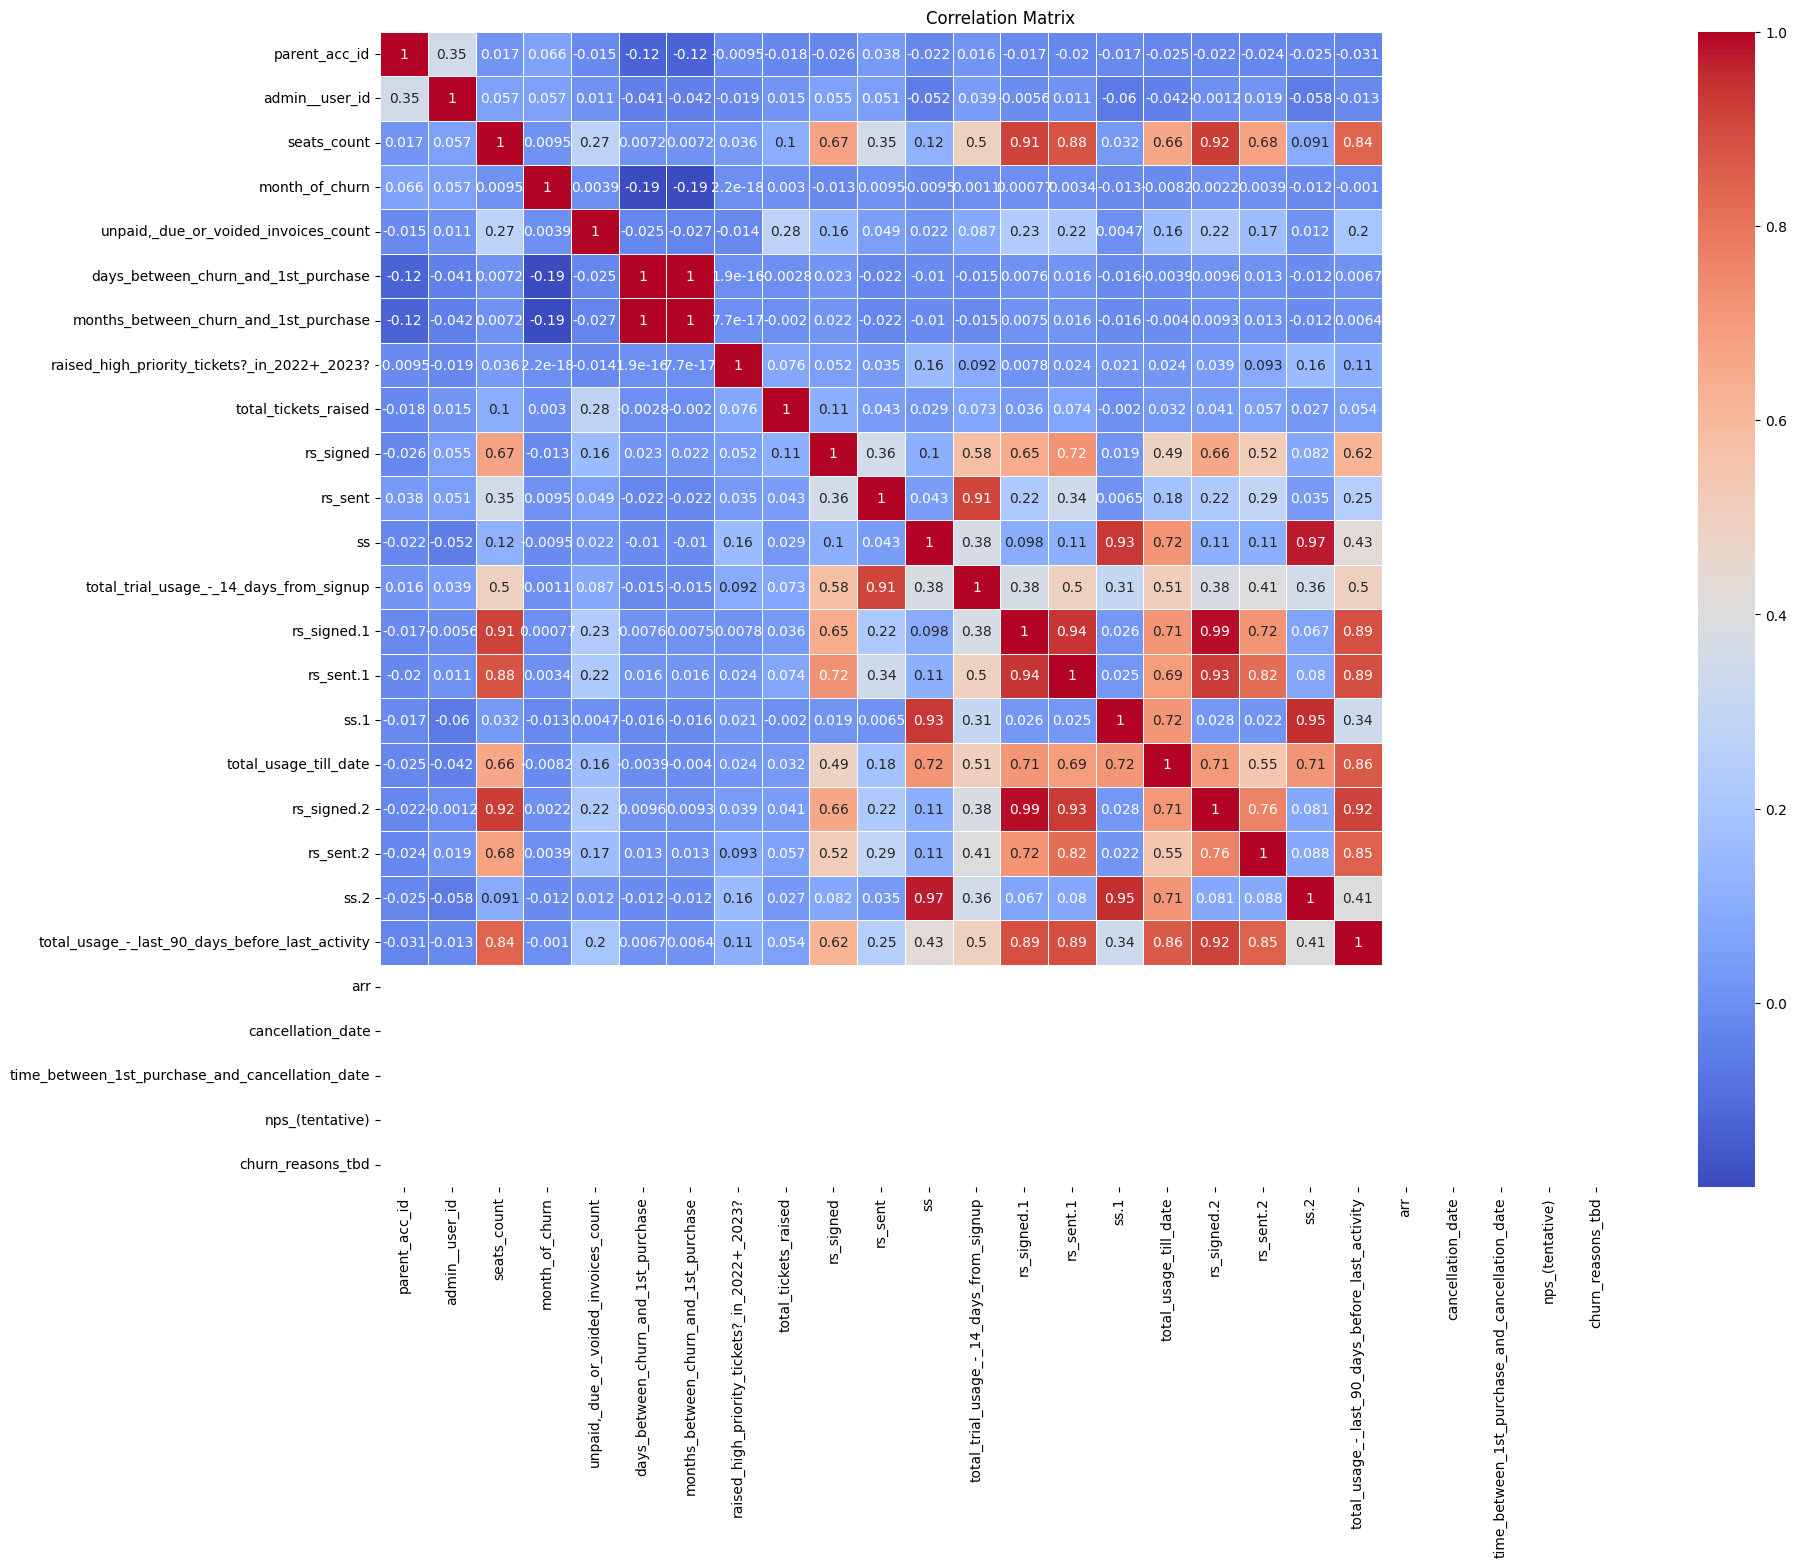

In [23]:
data = pd.read_csv("/content/Retention vs Churn analysis - SJ - Phase 2 - Web All Fresh Purchases 2022 + 2023 (1).csv")
for col in data.columns:
    if data[col].dtype == 'object':
        try:
            data[col] = pd.to_numeric(data[col])
        except ValueError:
            data[col] = data[col].fillna(data[col].mode()[0])  # Fill categorical with mode
    else:
        data[col] = data[col].fillna(data[col].mean())  # Fill numerical with mean


for col in data.columns:
    if data[col].dtype == 'object':
        try:
            data[col] = pd.to_numeric(data[col])
        except ValueError:
            pass

data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

numeric_data = data.select_dtypes(include=['int64', 'float64'])

summary_stats = numeric_data.describe()

num_features = numeric_data.columns

cat_features = data.select_dtypes(include=['object']).columns
cat_value_counts = {col: data[col].value_counts() for col in cat_features}


correlation_matrix = numeric_data.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

1. The factors rs_signed and rs_sent show a strong positive correlation (close to 1), indicating that when rs_signed increases, rs_sent also increases.
2. The correlation between rs_signed and total_usage_till_date is moderate, indicating a potential relationship between these variables that could be explored further in your analysis.
3. The variables total_usage_last_90_days_before_last_activity and total_usage_till_date also have a strong correlation, suggesting they might represent similar or related behaviors in the data.


<ipython-input-24-a4a23576ab02>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['mrr_movement_in_account_currency'] = pd.to_numeric(X['mrr_movement_in_account_currency'].str.replace('$', '').str.replace(',', ''), errors='coerce')
<ipython-input-24-a4a23576ab02>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['mrr_movement_in_account_currency'] = X['mrr_movement_in_account_currency'].fillna(X['mrr_movement_in_account_currency'].mean())


Mean Squared Error: 5098186.39994857
R^2 Score: 0.05652150190859018


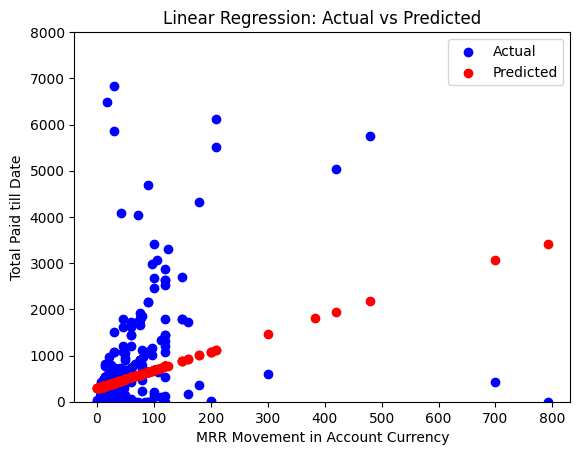

In [24]:
# Total paid till date vs. mrr account currency

data2 = pd.read_csv("/content/Retention vs Churn analysis - SJ - Phase 2 - Web All Fresh Purchases 2022 + 2023 (1).csv")

X = data2[['mrr_movement_in_account_currency']]
y = data2['Total Paid till date']

X['mrr_movement_in_account_currency'] = pd.to_numeric(X['mrr_movement_in_account_currency'].str.replace('$', '').str.replace(',', ''), errors='coerce')
X['mrr_movement_in_account_currency'] = X['mrr_movement_in_account_currency'].fillna(X['mrr_movement_in_account_currency'].mean())

y = pd.to_numeric(y.astype(str).str.replace('$', '').str.replace(',', ''), errors='coerce')
y = y.fillna(y.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualize
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')

plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('MRR Movement in Account Currency')
plt.ylabel('Total Paid till Date')
plt.ylim(0, 8000)
plt.legend()
plt.show()

<ipython-input-25-a9fc582b269a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['customer_external_id'] = X['customer_external_id'].astype('category').cat.codes


Random Forest - Mean Squared Error: 5904642.920199607
Random Forest - R^2 Score: -0.09272262665252873


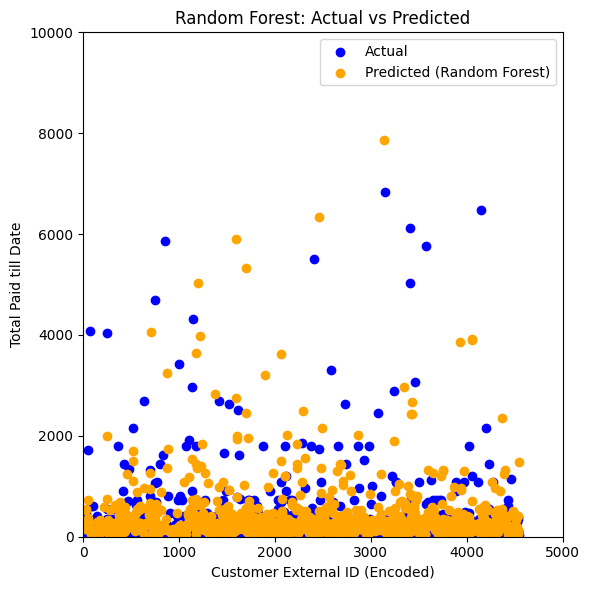

In [25]:
# customer behavior and predicting churn based on their payment history
data3 = pd.read_csv("/content/Retention vs Churn analysis - SJ - Phase 2 - Web All Fresh Purchases 2022 + 2023 (1).csv")

X = data3[['customer_external_id']]
y = data3['Total Paid till date']

y = pd.to_numeric(y.astype(str).str.replace('$', '').str.replace(',', ''), errors='coerce')
y = y.fillna(y.mean())

X['customer_external_id'] = X['customer_external_id'].astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)

y_pred_forest = forest_model.predict(X_test)

mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f'Random Forest - Mean Squared Error: {mse_forest}')
print(f'Random Forest - R^2 Score: {r2_forest}')

plt.figure(figsize=(6, 6))

mask = (y_test <= 10000) & (y_pred_forest <= 10000)
plt.scatter(X_test[mask], y_test[mask], color='blue', label='Actual')
plt.scatter(X_test[mask], y_pred_forest[mask], color='orange', label='Predicted (Random Forest)')

plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Customer External ID (Encoded)')
plt.ylabel('Total Paid till Date')
plt.xlim(0, 5000)
plt.ylim(0, 10000)
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
# relationship between the signup date and customer retention
data4 = pd.read_csv("/content/Retention vs Churn analysis - SJ - Phase 2 - Web All Fresh Purchases 2022 + 2023 (1).csv")

data4['signup date'] = pd.to_datetime(data4['signup date'], errors='coerce')
data4['Total Paid till date'] = pd.to_numeric(data4['Total Paid till date'].astype(str).str.replace('$', '').str.replace(',', ''), errors='coerce')

data4['Total Paid till date'] = data4['Total Paid till date'].fillna(data4['Total Paid till date'].mean())

X = data4[['signup date']]
y = data4['Total Paid till date']

X['signup date'] = X['signup date'].apply(lambda x: x.timestamp() if pd.notnull(x) else np.nan)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)

y_pred_forest = forest_model.predict(X_test)

mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f'Random Forest - Mean Squared Error: {mse_forest}')
print(f'Random Forest - R^2 Score: {r2_forest}')

plt.figure(figsize=(8, 6))


mask = (y_test <= 10000) & (y_pred_forest <= 10000)
plt.scatter(y_test[mask], y_pred_forest[mask], color='orange', label='Predicted')
plt.scatter(y_test[mask], y_test[mask], color='blue', label='Actual')

plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Total Paid till Date')
plt.ylabel('Predicted Total Paid till Date')
plt.xlim(0, 10000)
plt.ylim(0, 10000)
plt.legend()
plt.show()

<ipython-input-26-42a87f6ff453>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['signup date'] = X['signup date'].apply(lambda x: x.timestamp() if pd.notnull(x) else np.nan)


ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Ideally, the dots should cluster closely around a diagonal line (y=x), indicating accurate predications.
In this case, we observe a reasonable spread of the orange dots around the blue dots. However, we can notice instances where the predicted values deviate significantly from the actual values, especially in the lower range of total paid till date. So, here the model might need improvement.

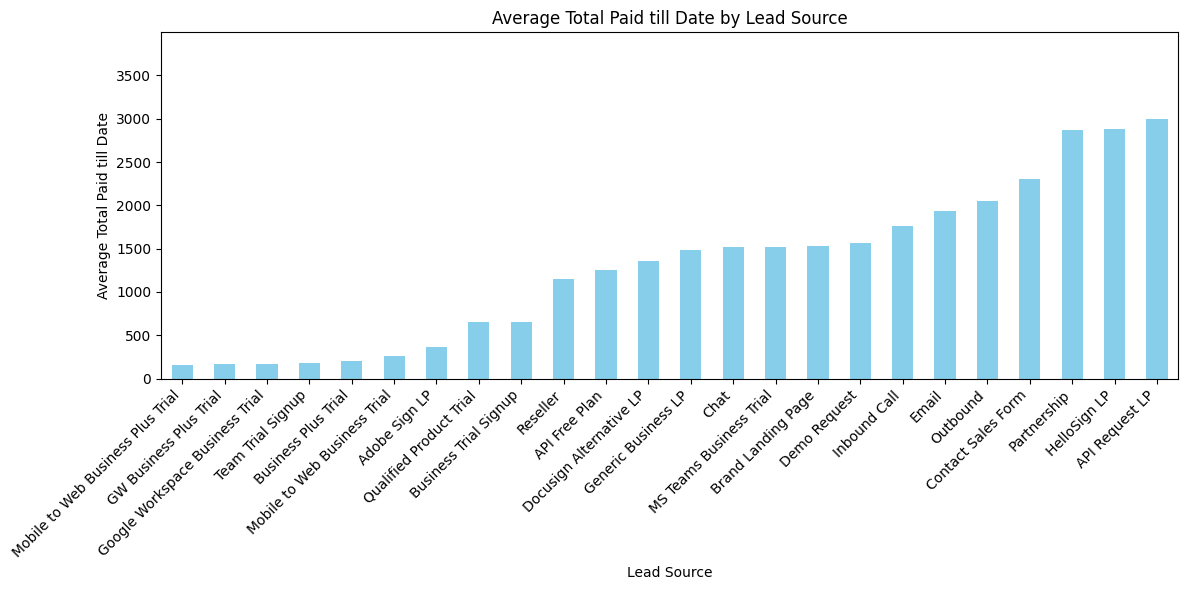

In [27]:
#effectiveness of different lead sources in generating revenue and retaining customers
data5 = pd.read_csv("/content/Retention vs Churn analysis - SJ - Phase 2 - Web All Fresh Purchases 2022 + 2023 (1).csv")

data5['Total Paid till date'] = pd.to_numeric(data5['Total Paid till date'].astype(str).str.replace('$', '').str.replace(',', ''), errors='coerce')

lead_source_avg = data5.groupby('Lead Source')['Total Paid till date'].mean().sort_values()

plt.figure(figsize=(12, 6))
lead_source_avg.plot(kind='bar', color='skyblue')
plt.title('Average Total Paid till Date by Lead Source')
plt.xlabel('Lead Source')
plt.ylabel('Average Total Paid till Date')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, lead_source_avg.max() + 1000)
plt.tight_layout()
plt.show()


Observations: Some lead sources, like "API Request LP" and "HElloSign LP", seem to be driving customers with higher average spending. These could be considered high-performing channels.
Conversely, lead sources like "Mobile to Web Business Plus Trial" and "GW Business Plus Trial" have lower average spending, suggesting they might be less effective in terms of revenue generation.

Chat and Email lead sources show reasonable confidence.

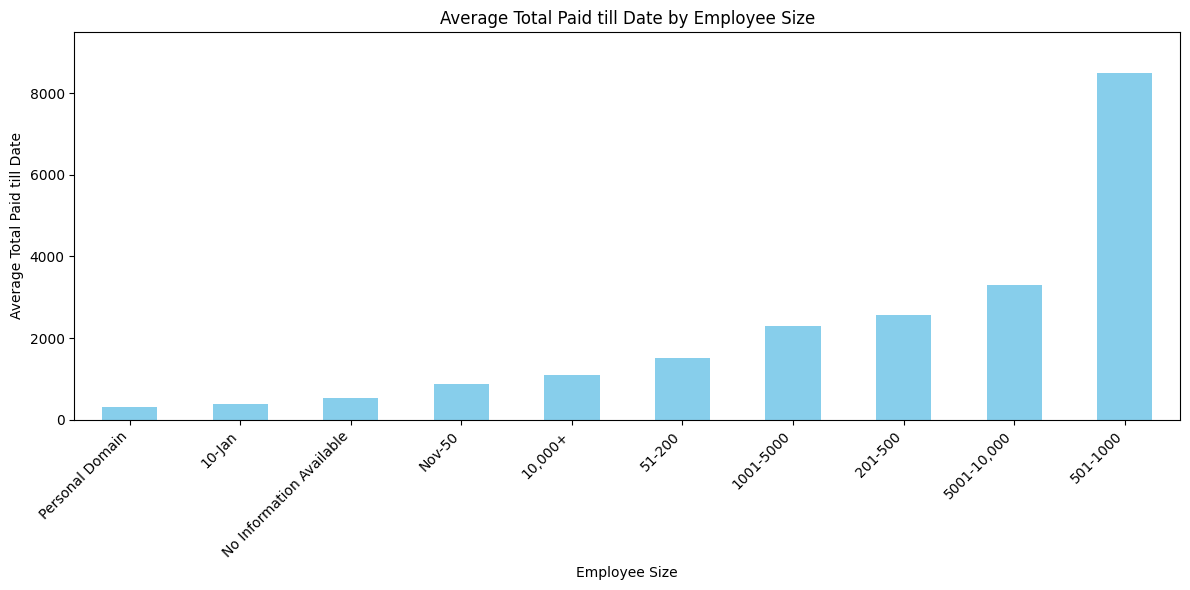

In [28]:
# how company size influences payment behavior and retention
data6 = pd.read_csv("/content/Retention vs Churn analysis - SJ - Phase 2 - Web All Fresh Purchases 2022 + 2023 (1).csv")


data6['Total Paid till date'] = pd.to_numeric(data6['Total Paid till date'].astype(str).str.replace('$', '').str.replace(',', ''), errors='coerce')


employee_size_avg = data6.groupby('employee size')['Total Paid till date'].mean().sort_values()

plt.figure(figsize=(12, 6))
employee_size_avg.plot(kind='bar', color='skyblue')
plt.title('Average Total Paid till Date by Employee Size')
plt.xlabel('Employee Size')
plt.ylabel('Average Total Paid till Date')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, employee_size_avg.max() + 1000)
plt.tight_layout()
plt.show()


<ipython-input-29-934636b46d21>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  original_source_avg = data.groupby('Original Source')['Total Paid till date'].mean().reset_index()


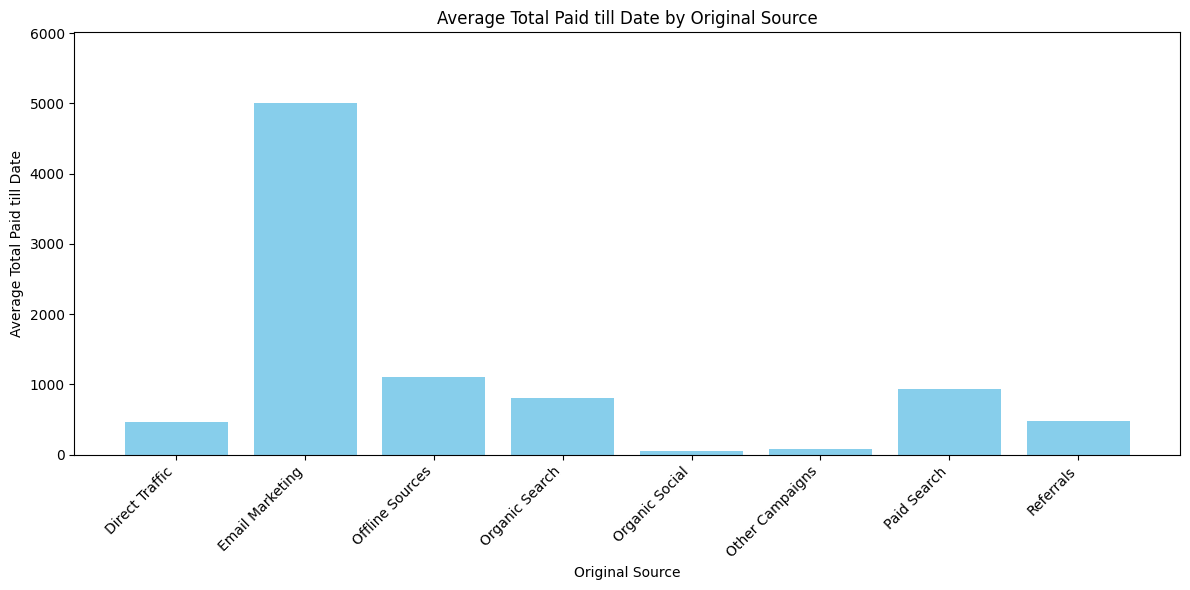

In [29]:
# effectiveness of different marketing channels in generating revenue

data = pd.read_csv("/content/Retention vs Churn analysis - SJ - Phase 2 - Web All Fresh Purchases 2022 + 2023 (1).csv")

data['Total Paid till date'] = pd.to_numeric(data['Total Paid till date'].astype(str).str.replace('$', '').str.replace(',', ''), errors='coerce')

data['Original Source'] = data['Original Source'].astype('category')

original_source_avg = data.groupby('Original Source')['Total Paid till date'].mean().reset_index()

original_source_avg = original_source_avg.dropna()

plt.figure(figsize=(12, 6))
plt.bar(original_source_avg['Original Source'], original_source_avg['Total Paid till date'], color='skyblue')
plt.title('Average Total Paid till Date by Original Source')
plt.xlabel('Original Source')
plt.ylabel('Average Total Paid till Date')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, original_source_avg['Total Paid till date'].max() + 1000)
plt.tight_layout()
plt.show()

In [30]:
#analyse the churn for product usage patterns
from datetime import datetime, timedelta

data = pd.read_csv("/content/Retention vs Churn analysis - SJ - Phase 2 - Web All Fresh Purchases 2022 + 2023 (1).csv")
data['activation_date'] = pd.to_datetime(data['activation_date'])

daily_usage = data.groupby('activation_date').agg({'RS Signed': 'sum', 'RS Sent': 'sum'}).reset_index()

daily_usage['total_usage'] = daily_usage['RS Signed'] + daily_usage['RS Sent']

churn_date = daily_usage['activation_date'].max()

last_90_days = daily_usage[daily_usage['activation_date'] >= churn_date - timedelta(days=90)]

print(last_90_days)

     activation_date  RS Signed  RS Sent  total_usage
1728      2023-11-18          4        5            9
1729      2023-11-20         27       30           57
1730      2023-11-21          0       40           40
1731      2023-11-22          1       48           49
1732      2023-11-23          0        2            2
1733      2023-11-24          0        1            1
1734      2023-11-26          6        6           12
1735      2023-11-27          4       22           26
1736      2023-11-28          0       46           46
1737      2023-11-29         31       76          107
1738      2023-11-30          0       67           67
1739      2023-12-01          2       43           45
1740      2023-12-03          0        0            0
1741      2023-12-04          3       37           40
1742      2023-12-05          0       51           51
1743      2023-12-06          4      132          136
1744      2023-12-07          7       13           20
1745      2023-12-08        

In [31]:
daily_usage['change_signed'] = daily_usage['RS Signed'].diff().fillna(0)
daily_usage['change_sent'] = daily_usage['RS Sent'].diff().fillna(0)
daily_usage['change_total'] = daily_usage['total_usage'].diff().fillna(0)

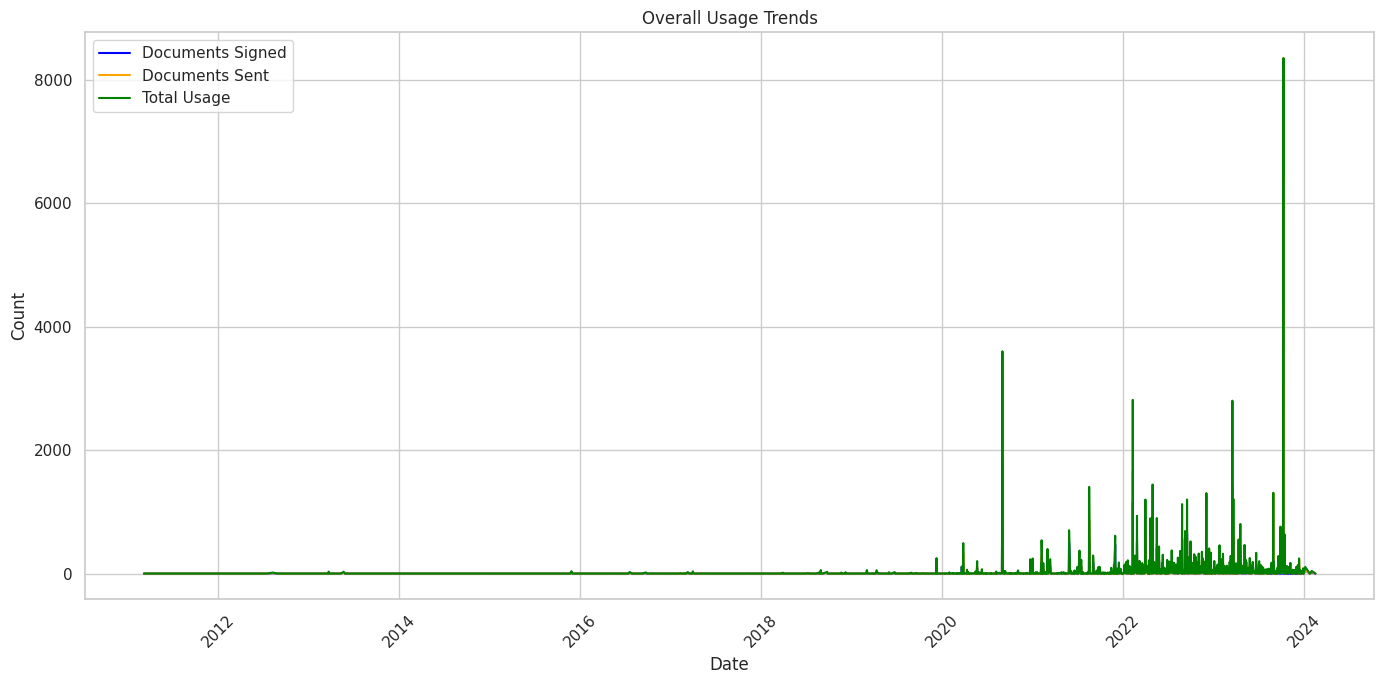

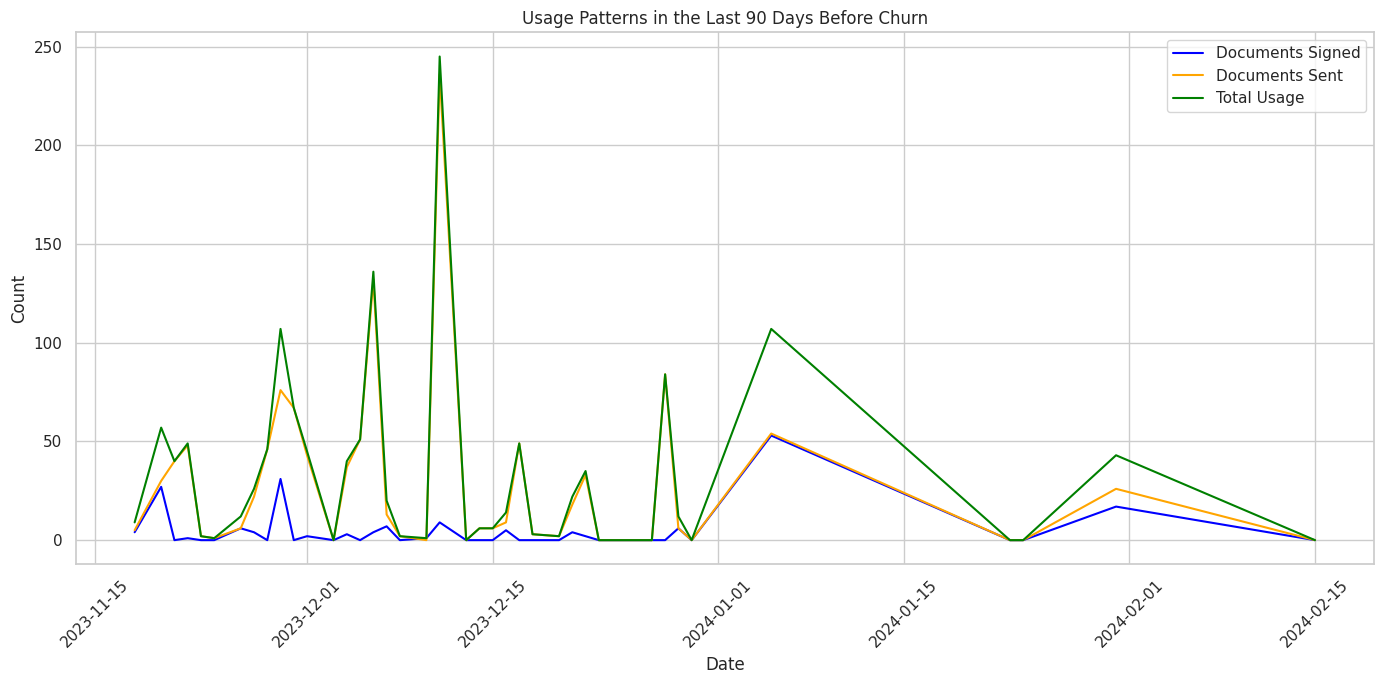

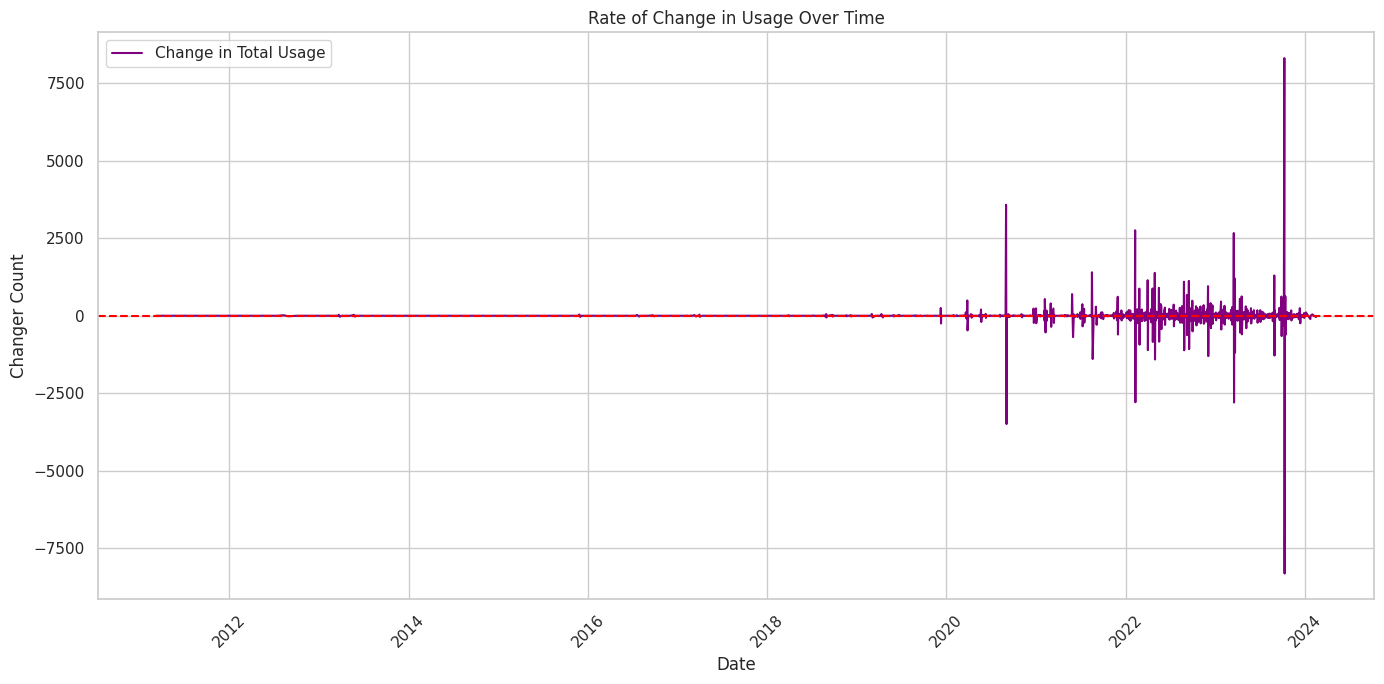

In [32]:
# Set the style for the plots
sns.set(style="whitegrid")

plt.figure(figsize=(14, 7))
plt.plot(daily_usage['activation_date'], daily_usage['RS Signed'], label='Documents Signed', color='blue')
plt.plot(daily_usage['activation_date'], daily_usage['RS Sent'], label='Documents Sent', color='orange')
plt.plot(daily_usage['activation_date'], daily_usage['total_usage'], label='Total Usage', color='green')
plt.title('Overall Usage Trends')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(last_90_days['activation_date'], last_90_days['RS Signed'], label='Documents Signed', color='blue')
plt.plot(last_90_days['activation_date'], last_90_days['RS Sent'], label='Documents Sent', color='orange')
plt.plot(last_90_days['activation_date'], last_90_days['total_usage'], label='Total Usage', color='green')
plt.title('Usage Patterns in the Last 90 Days Before Churn')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(daily_usage['activation_date'], daily_usage['change_total'], label='Change in Total Usage', color='purple')
plt.title('Rate of Change in Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Changer Count')
plt.axhline(0, color='red', linestyle='--')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Overall Usage Trends graph
- There's a significant increase in overall usage starting around 2020, with high-usage spikes.
- The frequency and intensity of usage spikes increase from 2020 onwards, suggesting growing adoption and more active users.
- Total usage (green line) shows the most dramatic spikes, indicating periods of intense activity.

Usage patterns in the last 90 days before churn
- In the 90 days leading up to churn, there's a general decline in usage across all metrics (documents signed, sent, and total usage).
- Usage is inconsistent, with several spikes followed by periods of low or no activity.
- The highest spike occurs around 45-60 days before churn, possibly indicating a last burst of activity before disengagement.

Rate of change in usage over time
- There are frequent positive and negative swings, suggesting inconsistent usage patterns.
- Some extremely large positive and negative changes are visible, which could represent either rapid adoption or sudden disengagement.

2567
Accuracy: 0.1474036850921273
              precision    recall  f1-score   support

         1.0       0.20      0.55      0.30        92
         2.0       0.31      0.09      0.14        58
         3.0       0.11      0.49      0.17        53
         4.0       0.00      0.00      0.00        34
         5.0       0.00      0.00      0.00        40
         6.0       0.00      0.00      0.00        43
         7.0       0.00      0.00      0.00        39
         8.0       0.00      0.00      0.00        47
         9.0       0.00      0.00      0.00        47
        10.0       0.00      0.00      0.00        57
        11.0       0.12      0.12      0.12        50
        12.0       0.00      0.00      0.00        37

    accuracy                           0.15       597
   macro avg       0.06      0.10      0.06       597
weighted avg       0.08      0.15      0.08       597

Feature Importances:
              feature  importance
0         Seats count    0.544597
1  Latest 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


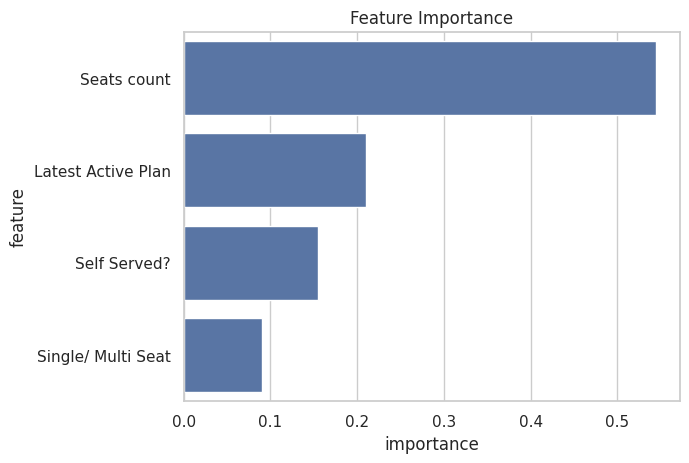

In [35]:
# model combining seat count, plan type, single-seat vs multi-seat, self-served vs. sales-assisted

data = pd.read_csv("/content/Retention vs Churn analysis - SJ - Phase 2 - Web All Fresh Purchases 2022 + 2023 (1).csv")

features = ['Seats count', 'Latest Active Plan', 'Single/ Multi Seat', 'Self Served?']

label_encodes = {}
for feature in features:
  if data[feature].dtype == 'object':
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encodes[feature] = le

target = 'month of churn'

print(data[target].isna().sum())
data.dropna(subset = features + [target], inplace = True)

X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

importances = model.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

print("Feature Importances:")
print(feature_importances)
import matplotlib.pyplot as plt
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()

This graph explains the importance of these features, we can notice seats count play a major role in determining churn.

In [36]:
#model on customer lifestyle: time since 1st purchase, purchase behaviour, seasonality of churn

churn_data = pd.read_csv("/content/Retention vs Churn analysis - SJ - Phase 2 - Web All Fresh Purchases 2022 + 2023 (1).csv")

churn_data.rename(columns={churn_data.columns[17]: 'first_purchase_date'}, inplace=True)



              precision    recall  f1-score   support

           0       0.61      0.70      0.65       492
           1       0.57      0.47      0.51       419

    accuracy                           0.59       911
   macro avg       0.59      0.58      0.58       911
weighted avg       0.59      0.59      0.59       911


Confusion Matrix:
[[342 150]
 [223 196]]


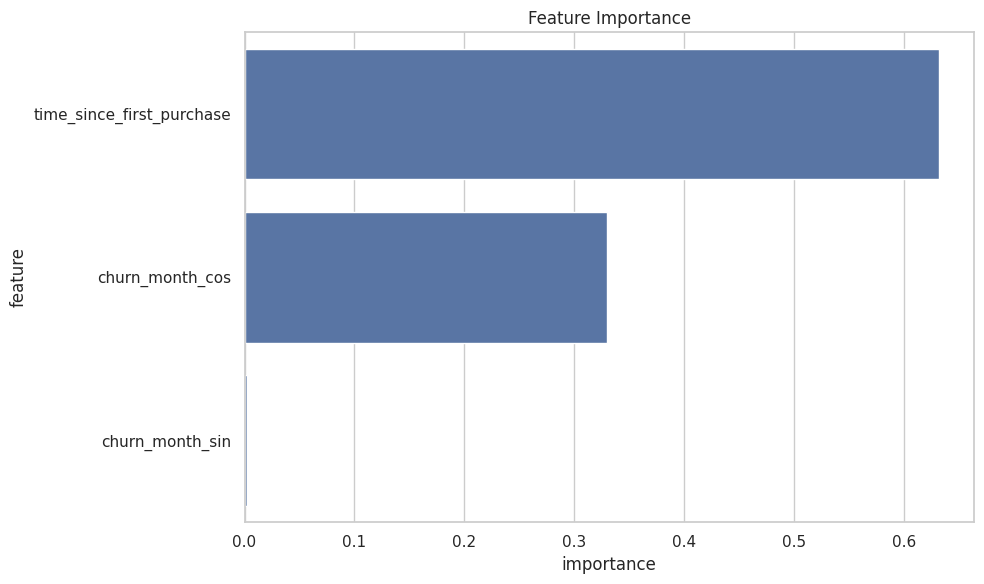

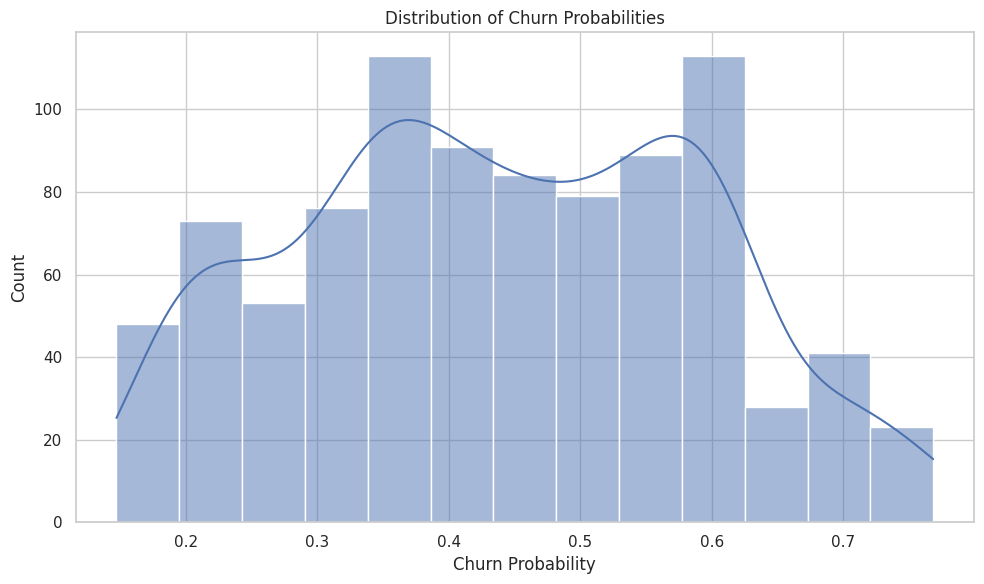

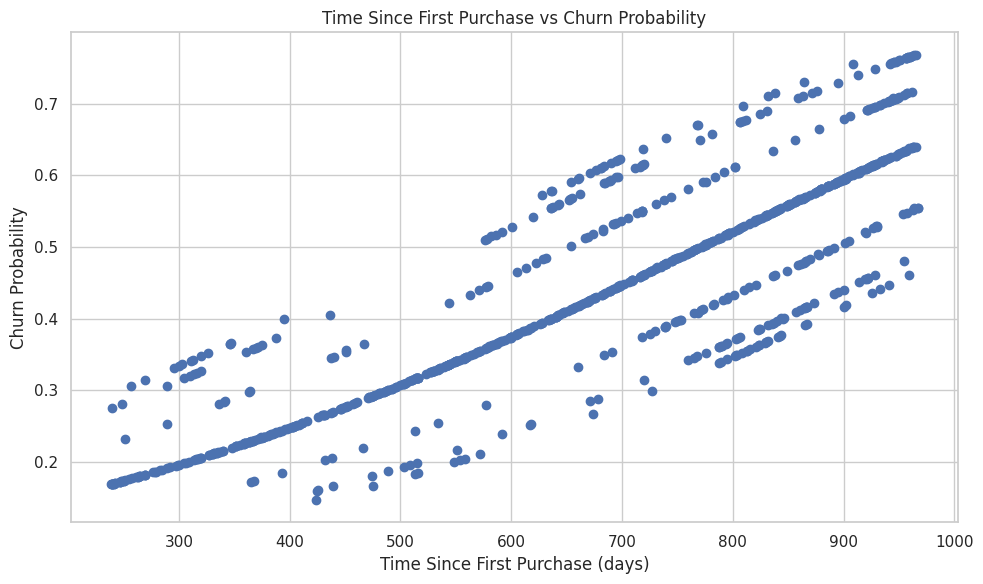

In [37]:
from sklearn.impute import SimpleImputer
def engineer_features(df):
    df['time_since_first_purchase'] = (pd.to_datetime('today') - pd.to_datetime(df['first_purchase_date'])).dt.days

    df['churned'] = df['churn_date'].notna().astype(int) # 1 if churned, 0 otherwise

    df['month of churn'] = pd.to_datetime(df['churn_date']).dt.month
    df['month of churn'].fillna(0, inplace=True) # Replace NaN with 0, or another suitable strategy

    df['churn_month_sin'] = np.where(df['month of churn'] != 0, np.sin(2 * np.pi * df['month of churn']/12), 0)
    df['churn_month_cos'] = np.where(df['month of churn'] != 0, np.cos(2 * np.pi * df['month of churn']/12), 0)

    return df

churn_data = engineer_features(churn_data)

features = ['churn_month_sin', 'churn_month_cos', 'time_since_first_purchase']
X = churn_data[features]
y = churn_data['churned']  # Assuming 'churned' is a binary column (0 for retained, 1 for churned)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy = 'mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# Churn probability distribution
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_proba, kde=True)
plt.title('Distribution of Churn Probabilities')
plt.xlabel('Churn Probability')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Time since first purchase vs Churn probability
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 2], y_pred_proba)
plt.title('Time Since First Purchase vs Churn Probability')
plt.xlabel('Time Since First Purchase (days)')
plt.ylabel('Churn Probability')
plt.tight_layout()
plt.show()

imputer = SimpleImputer(strategy = 'mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Insights

Graph1 - Feature Importance
- The time since a customer's first purchase is the strongest prediction of churn.
- The sine component of the month doesn't contribute much, suggesting the seasonality might be more annual than semi-annual.

Graph2 - Distribution of churn probabilities
- There seems to be 2 distinct group of customers: one with lower churn(around 35% prob) and another with higher churn risk(around 55% prob)
- Few customers have very low(<20%) or very high(>70%) churn probability.

Graph3 - Time since first purchase vs Churn probability
- There are multiple distinct lines or clusters of points, suggesting different customer segments or cohorts.
- The distinct lines suggest there might be different types of customers or subscription plans with varying churn patterns.

In [55]:
churn_data = churn_data.rename(columns={'subscriber since? 1st purchase date': 'first_purchase_date'})


In [56]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4555 entries, 0 to 4554
Data columns (total 69 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   subscription_external_id                         4553 non-null   object 
 1   Unnamed: 1                                       4553 non-null   object 
 2   parent acc id                                    4553 non-null   float64
 3   Unnamed: 3                                       4553 non-null   object 
 4   admin _user_id                                   4373 non-null   float64
 5   Unnamed: 5                                       4553 non-null   object 
 6   admin_ email                                     4553 non-null   object 
 7   customer_name                                    4550 non-null   object 
 8   customer_uuid                                    4553 non-null   object 
 9   customer_external_id          

In [60]:
churn_data = pd.read_csv("/content/Retention vs Churn analysis - SJ - Phase 2 - Web All Fresh Purchases 2022 + 2023 (1).csv")

churn_data['time_since_first_purchase'] = pd.to_datetime(churn_data['first_purchase_date'])
data['Latest Billing Cycle'] = data['Latest Billing Cycle'].astype('category')

current_date = datetime.now()
data['time_since_first_purchase'] = (current_date - data['first_purchase_date']).dt.days

monthly_data = data[data['billing_cycle'] == 'monthly']
yearly_data = data[data['billing_cycle'] == 'yearly']



KeyError: 'first_purchase_date'

In [ ]:
monthly_stats = monthly_data['time_since_first_purchse'].describe(percentiles = [.25, .5, .75])
